<a href="https://colab.research.google.com/github/iversonzpy/MachineLearning/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPS 218 Spring 2019 Assignment 2 Programming Component

## Gradient descent for logistic regression

Given the dataset below, implement the logistic regression algorithm, optimizing the parameters using gradient descent and squared error as the loss function. 

(100, 2) (100,)


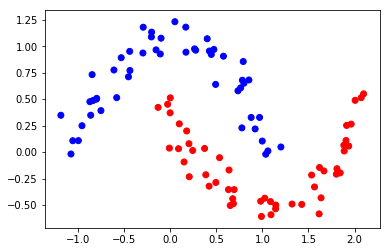

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons

np.random.seed(33)
data, labels = make_moons(n_samples=100, noise=0.1)
colors = ['r' if y else 'b' for y in labels]
print(data.shape, labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

Intial Accuracy:29%
Step 32 Accuracy:86%, Loss: 0.04771330613315589
ws [ 0.56434751  0.17690357 -0.58674415]


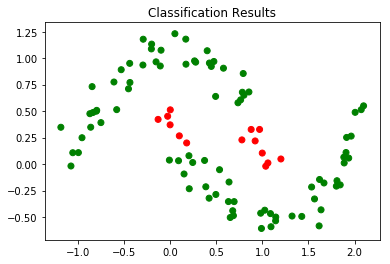

In [87]:
import math

def logistic(x, w):
    return np.dot(x, w)
    
def sigmoid(z):
    return 1 / (1 + np.e**(-z))

def sigmoid_derivative(z):
    x = sigmoid(z)
    return x *(1 - x)
  
# mean square error
def loss_func(y, h):
    return 1/2 * (np.square(y-h).mean())
  
def loss_func_derivative(y, h, x):
    return np.dot((y - h) * sigmoid_derivative(h), x)
    
def accuracy(y, h):
    return np.sum(y == h)
    
def logistic_regression(x, y, loss_func_derivative, learning_rate, num_steps=1000):
    # start with intial parameters w_i = 1
    w = np.ones(3)
    # include a bias term
    x = np.pad(x, [[0,0], [1,0]], mode='constant', constant_values=1.0)
    # print("x", x)

    print('Intial Accuracy:{}%'.format(accuracy(y, np.round(logistic(x, w)))))
    prev_loss = 0
    for step in range(num_steps):
        h = logistic(x, w)
        loss = loss_func(y, h)
        if math.fabs(loss - prev_loss) < 0.0000001:
            # return when converged.
            return w
                
        w = w + learning_rate * loss_func_derivative(y, h, x)
        if step > 30:
          print('Step {} Accuracy:{}%, Loss: {}'.format(step+1, accuracy(y, np.round(logistic(x, w))), loss))
        prev_loss = loss
    return w
    
learning_rate = 0.05
ws = logistic_regression(data, labels, loss_func_derivative, learning_rate)
yh = np.round(logistic(np.pad(data, [[0,0], [1,0]], mode='constant', constant_values=1.0), ws))
colors = ['g' if _yh==_y else 'r' for _yh, _y in zip(yh, labels.astype(np.int))]
plt.title('Classification Results')
plt.scatter(data[:,0], data[:,1], c=colors)
print("ws", ws)

In [0]:
correct_w = np.array([ 0.74361534, 1.1188333, -4.98295293])
print("ws", ws)
print("correct_w", correct_w)
np.testing.assert_allclose(ws, correct_w, rtol=1e-5)

ws [ 0.56399194  0.17714014 -0.58611836]
correct_w [ 0.74361534  1.1188333  -4.98295293]


AssertionError: ignored

In [0]:
from scipy import ndimage
from scipy import misc

# Load the image using the imread function in scipy
originalImage3 = misc.imread('gauss.jpg')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [0]:
# originalImage3 is a hypermatrix of size 300x267x3. We only want to work with the first matrix in this hypermatrix
# Each pixel can have a value between 0 and 255 (8 bits), according to its gray intensity
originalImage3.shape, originalImage3.dtype

((300, 267, 3), dtype('uint8'))

In [0]:
# Create a new matrix called originalImage using only the the first matrix in originalImage3
# Remember: Python's column and row indexing starts with 0

originalImage = originalImage3 [: ,: ,0]

In [0]:
# Check: originalImage must be a matrix of size 300x267, where each pixel can have a value between 0 and 255 (8 bits)
originalImage.shape, originalImage.dtype

((300, 267), dtype('uint8'))

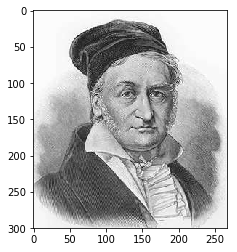

In [0]:
# Display the original image using the imshow function
plt.imshow(originalImage, cmap=plt.cm.gray)
plt.show()

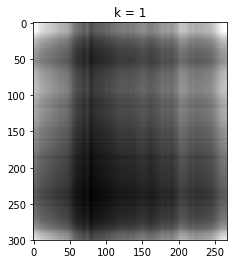

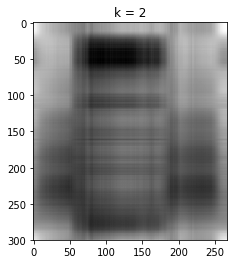

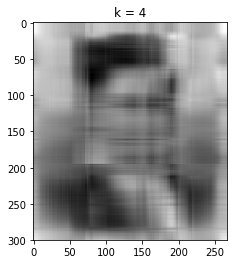

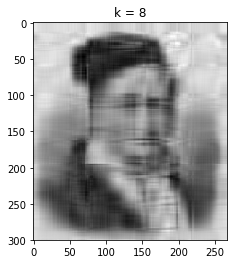

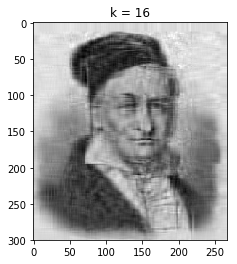

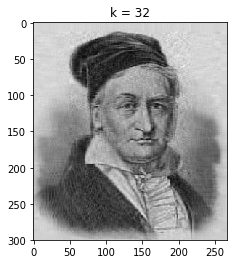

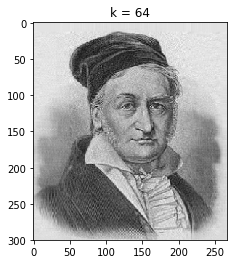

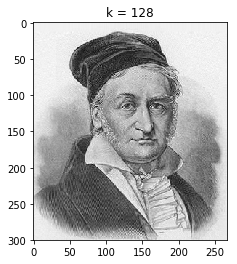

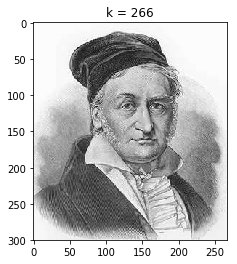

In [0]:
# Use the SVD implementation in numpy to create a compressed version of originalImage using the SVD of the matrix
# Use the first k singular values for k = 1, 2, 4, 8, 16, 32, 64, 128 and 266
from google.colab import files
# plt.savefig("abc.png")
# files.download("abc.png") 

U, sigma, V = np.linalg.svd(originalImage)
d = np.array([1, 2, 4, 8, 16, 32, 64, 128, 266]) 
for k in d:
  img = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
  plt.title('k = {}'.format(k))
  plt.imshow(img, cmap='gray') 
  filename = 'output_k_{}.png'.format(k)
  plt.savefig(filename)
  plt.show()